In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('data/insurance.csv')

In [49]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
premium     0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   premium   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [52]:
df.describe()

,age,bmi,children,premium
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [53]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [54]:
numerical_features

['age', 'bmi', 'children', 'premium']

In [55]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [56]:
categorical_features

['sex', 'smoker', 'region']

In [74]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]

In [75]:
discrete_features

['children']

In [76]:
cont_features = [feature for feature in numerical_features if feature not in discrete_features]

In [77]:
cont_features

['age', 'bmi', 'premium']

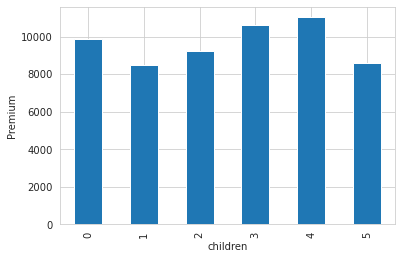

In [78]:
data = df.copy()
for feature in discrete_features:
	data.groupby(feature)['premium'].median().plot.bar()
	plt.ylabel('Premium')
	plt.show()

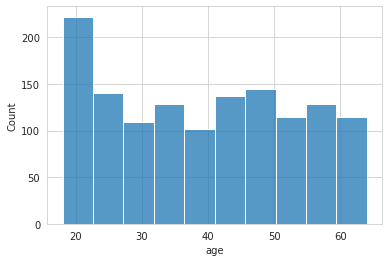

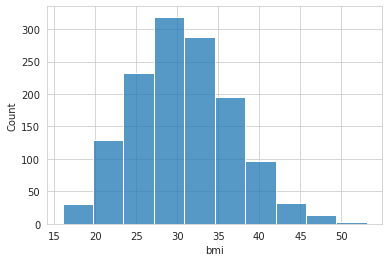

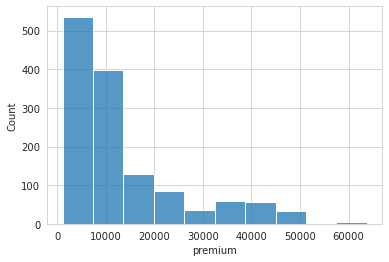

In [91]:
data = df.copy()
for feature in cont_features:
    sns.histplot(data[feature], bins=10)
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.show()

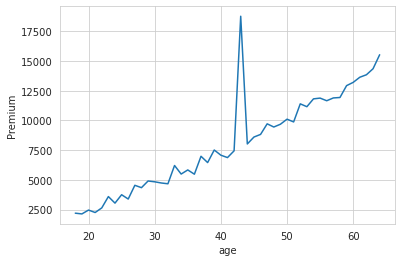

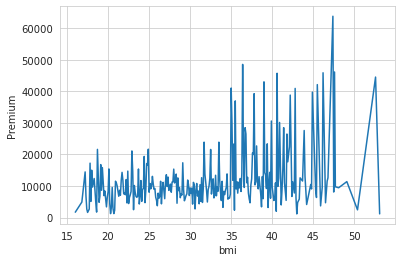

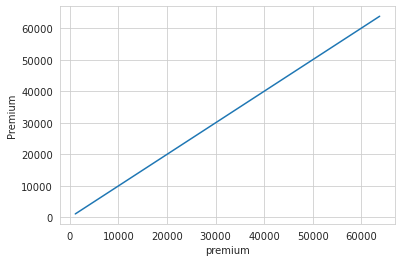

In [95]:
data = df.copy()
for feature in cont_features:
    data.groupby(feature)['premium'].median().plot()
    plt.ylabel('Premium')
    plt.xlabel(feature)
    plt.show()

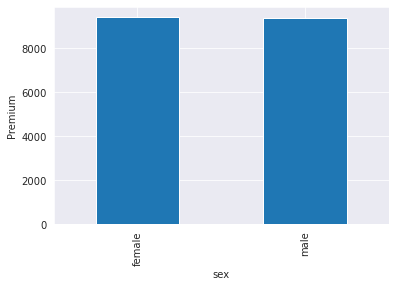

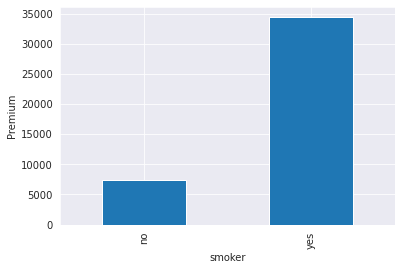

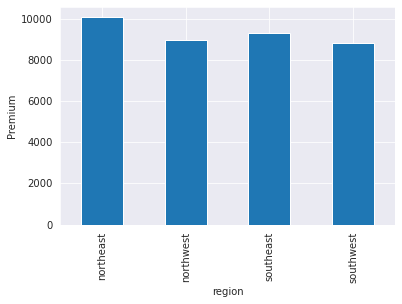

In [111]:
data = df.copy()
for feature in categorical_features:
    data.groupby(feature)['premium'].median().plot.bar()
    plt.ylabel('Premium')
    plt.xlabel(feature)
    plt.show()

In [99]:
fd = df[categorical_features]

In [100]:
fd

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


<AxesSubplot:>

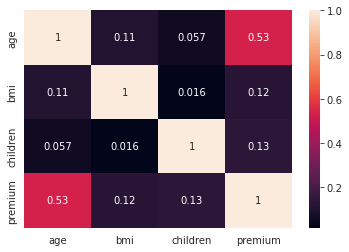

In [107]:
sns.heatmap(df.corr(method='spearman'), annot=True)